### Libraries

In [1]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 27.4 MB/s eta 0:00:00


In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, GlobalMaxPooling2D, Reshape
import visualkeras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
import seaborn as sns

### Dataset loading

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() 

11490434/11490434 [==============================] - 0s 0us/step


### Train - test basic info

In [4]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
Y_train, Y_test

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

### Data preprocessing

In [6]:
#Normalization

X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
#Categorization

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

### Creating models and layers

In [15]:
input_shape=(28,28)

In [16]:
#Sequential class

model_seq = tf.keras.models.Sequential([
    Flatten(input_shape=input_shape),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [10]:
#Model class

input = Input(input_shape)
X = Flatten()(input)
X = Dense(128, activation='relu')(X)
X = Dropout(0.2)(X)
output = Dense(10, activation='softmax')(X)

model = Model(input, output)


In [20]:
#CNN with model class

input2 = Input(input_shape)
X = Reshape((28, 28, 1))(input2)
X = Conv2D(16, kernel_size=3, activation='relu')(X)
X = Conv2D(32, 3, activation='relu')(X)
X = MaxPooling2D(3)(X)
X = Conv2D(32, 3, activation='relu')(X)
X = Conv2D(16, 3, activation='relu')(X)
X = GlobalMaxPooling2D()(X)
X = Dropout(0.2)(X)
output2 = Dense(10, activation='softmax')(X)

model_cnn = Model(input2, output2)


In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 32)          9248      
                                                           

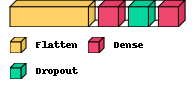

In [23]:
# Visualization
visualkeras.layered_view(model_seq, legend=True)

### Model configuration

In [25]:
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model_cnn.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model fitting

In [27]:
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 6s 4ms/step - loss: 0.4424 - accuracy: 0.8724 - val_loss: 0.2164 - val_accuracy: 0.9406
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2165 - accuracy: 0.9372 - val_loss: 0.1570 - val_accuracy: 0.9552
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1647 - accuracy: 0.9515 - val_loss: 0.1304 - val_accuracy: 0.9644
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1333 - accuracy: 0.9612 - val_loss: 0.1126 - val_accuracy: 0.9665
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1157 - accuracy: 0.9658 - val_loss: 0.1019 - val_accuracy: 0.9699
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0987 - accuracy: 0.9707 - val_loss: 0.0945 - val_accuracy: 0.9721
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0864 - accuracy: 0.9739 - val_loss: 0.0886 - val_accuracy: 0.9732
Epoch 

In [28]:
history_cnn = model_cnn.fit(X_train, Y_train, validation_split=0.2, epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 10s 7ms/step - loss: 0.8190 - accuracy: 0.7289 - val_loss: 0.1800 - val_accuracy: 0.9493
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2970 - accuracy: 0.9065 - val_loss: 0.1121 - val_accuracy: 0.9672
Epoch 3/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2169 - accuracy: 0.9308 - val_loss: 0.0879 - val_accuracy: 0.9762
Epoch 4/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1803 - accuracy: 0.9434 - val_loss: 0.0686 - val_accuracy: 0.9800
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1574 - accuracy: 0.9498 - val_loss: 0.0607 - val_accuracy: 0.9827
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1408 - accuracy: 0.9551 - val_loss: 0.0646 - val_accuracy: 0.9815
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1299 - accuracy: 0.9588 - val_loss: 0.0611 - val_accuracy: 0.9811
Epoch

### Evaluation

In [29]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9761


[0.07616540789604187, 0.9761000275611877]

In [30]:
model_cnn.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0545 - accuracy: 0.9848


[0.05450042709708214, 0.9847999811172485]

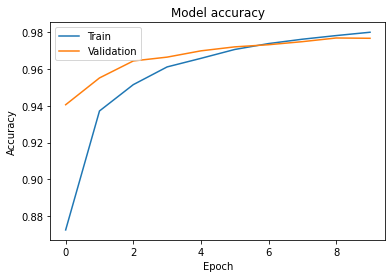

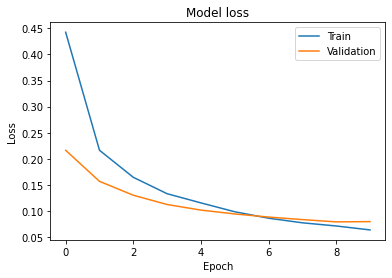

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

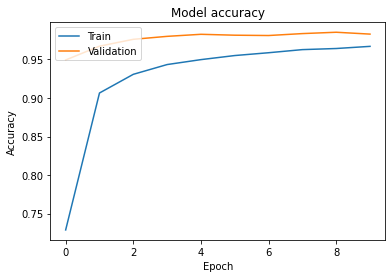

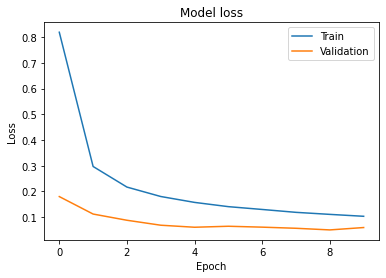

In [32]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

313/313 [==============================] - 1s 1ms/step
Accuracy: 0.9761
Precision: 0.976311661408209
Recall: 0.9757699723179906
F1 Score: 0.9759805792974359


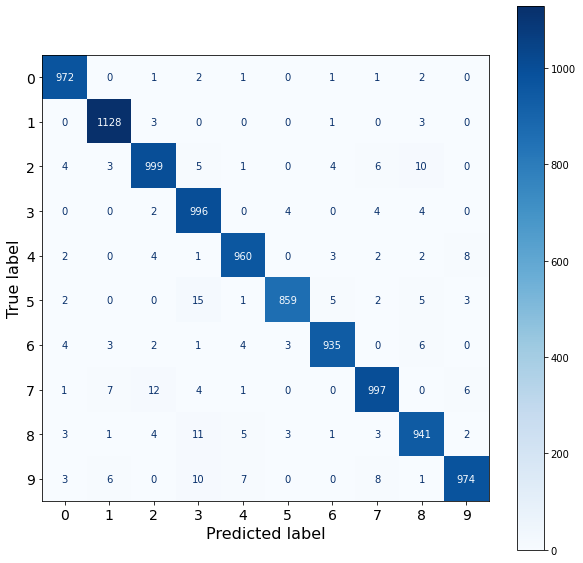

In [33]:
Y_pred = model.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_cal = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(Y_test_cal, Y_pred)
precision = precision_score(Y_test_cal, Y_pred, average='macro')
recall = recall_score(Y_test_cal, Y_pred, average='macro')
f1 = f1_score(Y_test_cal, Y_pred, average='macro')
cm = confusion_matrix(Y_test_cal, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#sns.heatmap(cm, annot=True)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.show()

313/313 [==============================] - 1s 2ms/step
Accuracy: 0.9848
Precision: 0.9849421522854092
Recall: 0.9846302720213739
F1 Score: 0.9847313214561211


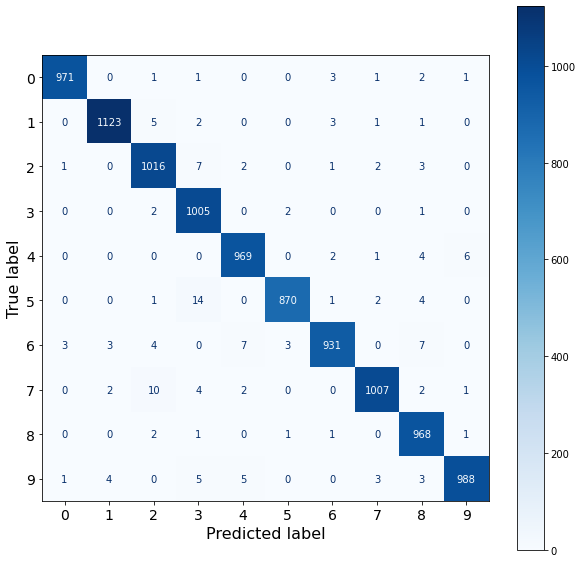

In [34]:
Y_pred = model_cnn.predict(X_test, verbose=1)
Y_pred = np.argmax(Y_pred, axis=1)
Y_test_cal = np.argmax(Y_test, axis=1)

accuracy = accuracy_score(Y_test_cal, Y_pred)
precision = precision_score(Y_test_cal, Y_pred, average='macro')
recall = recall_score(Y_test_cal, Y_pred, average='macro')
f1 = f1_score(Y_test_cal, Y_pred, average='macro')
cm = confusion_matrix(Y_test_cal, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#sns.heatmap(cm, annot=True)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(10, 10))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Predicted label', fontsize=16)
plt.ylabel('True label', fontsize=16)
plt.show()